In [1]:
import missingno 

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
!pip install pandas-profiling

In [5]:
pip install pandas-profiling

In [15]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc, roc_auc_score

In [7]:
df = pd.read_csv("Data file.csv")

In [8]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 209593 rows and 37 columns present in our dataframe. We have the label column that stores the defaulter and non deafulter values marked with 0 and 1 making this a Classification problem!

# Exploratory Data Analysis (EDA)

In [9]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

In [10]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


Removed the "Unnamed: 0" column from the dataset since it was only storing the index data starting from 1 instead of 0 and was not a worthy feature column.

The remaining columns are as follows:

label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}
    
msisdn : Mobile number of user
    
aon : Age on cellular network in days
    
daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    
daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    
rental30 : Average main account balance over last 30 days
    
rental90 : Average main account balance over last 90 days
    
last_rech_date_ma : Number of days till last recharge of main account
    
last_rech_date_da : Number of days till last recharge of data account
    
    
last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
    
cnt_ma_rech30 : Number of times main account got recharged in last 30 days
    
fr_ma_rech30 : Frequency of main account recharged in last 30 days
    
sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    
medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    
medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    
cnt_ma_rech90 : Number of times main account got recharged in last 90 days
    
fr_ma_rech90 : Frequency of main account recharged in last 90 days
    
sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    
medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    
medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    
cnt_da_rech30 : Number of times data account got recharged in last 30 days
    
fr_da_rech30 : Frequency of data account recharged in last 30 days
    
cnt_da_rech90 : Number of times data account got recharged in last 90 days
    
fr_da_rech90 : Frequency of data account recharged in last 90 days
    
cnt_loans30 : Number of loans taken by user in last 30 days
    
amnt_loans30 : Total amount of loans taken by user in last 30 days
    
maxamnt_loans30 : Maximum amount of loan taken by the user in last 30 days
    
medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
    
cnt_loans90 : Number of loans taken by user in last 90 days
    
amnt_loans90 : Total amount of loans taken by user in last 90 days
    
maxamnt_loans90 : Maximum amount of loan taken by the user in last 90 days
    
medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
    
payback30 : Average payback time in days over last 30 days
    
payback90 : Average payback time in days over last 90 days
    
pcircle : Telecom circle
    
pdate : Date

In [11]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 209593 Rows and 36 Columns in our dataframe


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [12]:
df.isna().sum() 

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Great we have no missing values therefore we won't have to worry about handling missing data.

<AxesSubplot:>

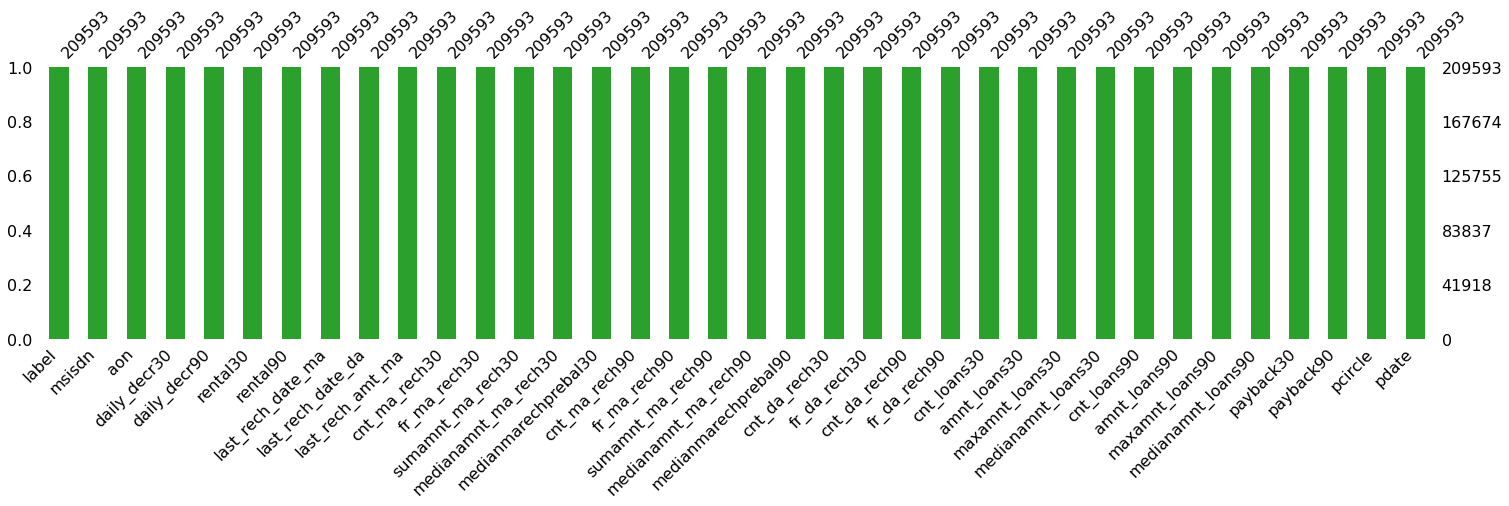

In [16]:
missingno.bar(df, figsize = (25,5), color="tab:green")

Just ensuring the missing data information with the help of a visual.

In [54]:
print("Number of Rows is {} and number of Columns is {} before dropping duplicates".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("Number of Rows is {} and number of Columns is {} after dropping duplicates".format(df.shape[0], df.shape[1]))

Number of Rows is 209593 and number of Columns is 36 before dropping duplicates
Number of Rows is 209592 and number of Columns is 36 after dropping duplicates


There was 1 duplicate record removed from our entire dataset.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

Using the info method we are able to confirm the non null count details as well as the datatype information. We have 21 float/decimal datatype, 12 integer datatype and 3 object/categorical datatype columns. We will need to convert the object datatype columns to numerical data before we input the information in our machine learning models.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


We have used the describe method to check the numerical data details. There are 33 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all mostly properly distributed in terms of data points but I do see some abnormality that we will confirm with a visual on it.

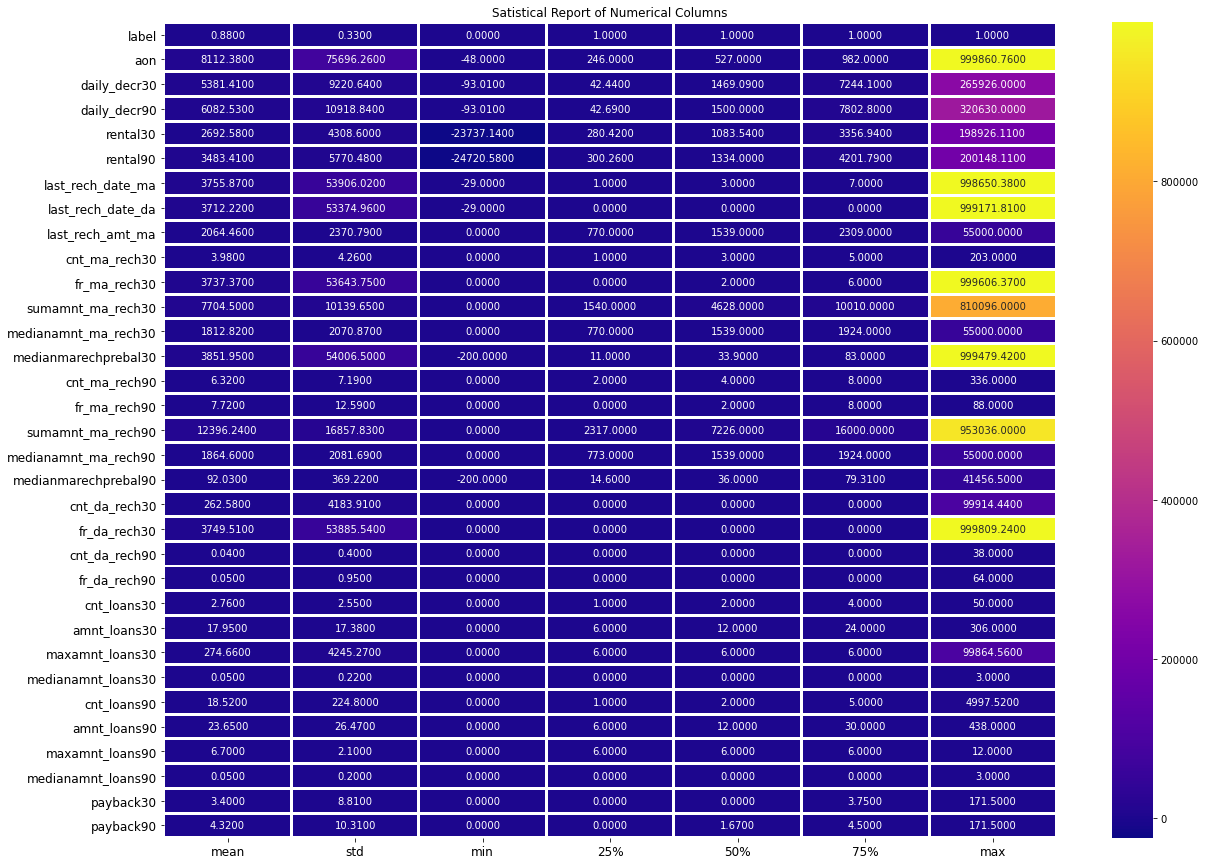

In [57]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="plasma")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In the above report we can see that the maximum value for columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, fr_ma_rech30, sumamnt_ma_rech30, medianmarechprebal30, sumamnt_ma_rech90 and fr_da_rech30 have quite a high number than the other column values.

In [19]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
pcircle,1
label,2
maxamnt_loans90,3
medianamnt_loans90,6
medianamnt_loans30,6
cnt_da_rech90,27
cnt_loans30,40
fr_da_rech90,46
amnt_loans30,48
amnt_loans90,69


In the above list we can see that column pcircle has 1 single data value filled in all the records and therefore do not conribute much towards the output label generation.

In [20]:
df.drop('pcircle', axis=1, inplace=True)

I have removed the column name "pcircle" since it is not contributing towards the label prediction.

In [21]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


Checking the correlation data for our columns in our entire dataset.

# Visualization


In [ ]:
pandas_profiling.ProfileReport(df)

pandas-profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. It generates interactive reports in web format that can be presented to any person, even if they don’t know programming. It also offers report generation for the dataset with lots of features and customizations for the report generated. In short, what pandas-profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

# Univariate Analysis

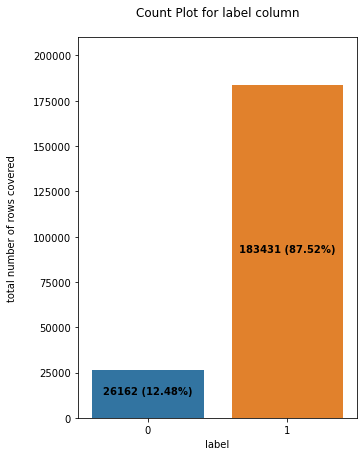

In [22]:
try:
    x = 'label'
    k=0
    plt.figure(figsize=[5,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plot we can see that our label data is imbalanced which will need to be balanced before we feed information into our calssification machine learning models.

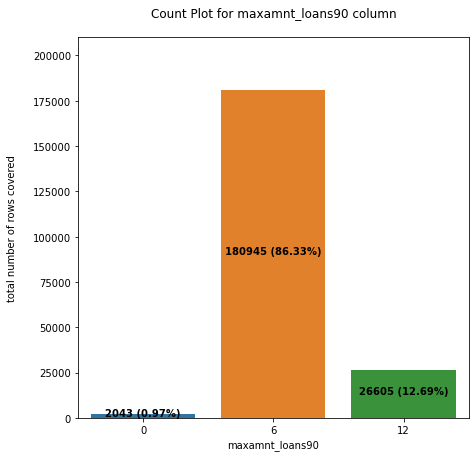

In [23]:
try:
    x = 'maxamnt_loans90'
    k=0
    plt.figure(figsize=[7,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

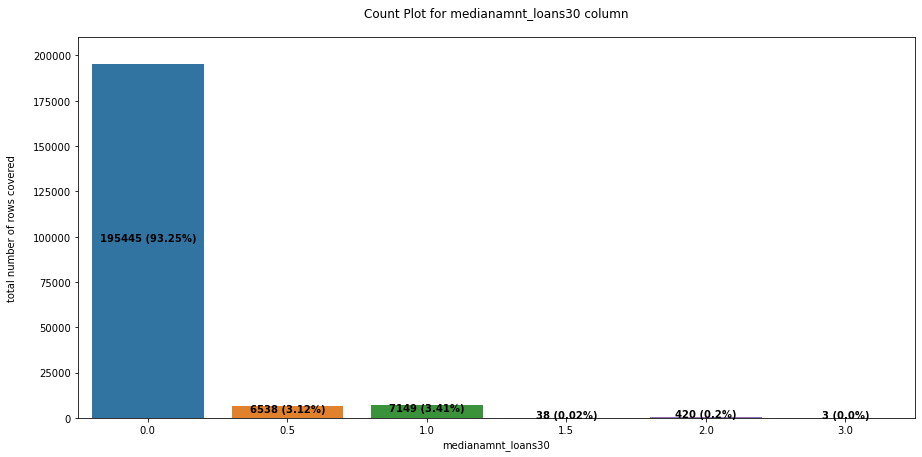

In [24]:
try:
    x = 'medianamnt_loans30'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In the above count plots we can see the categories present in the columns along with the percentage and number of rows covered by each unique value of that column in our dataset.

# Bivariate Analysis

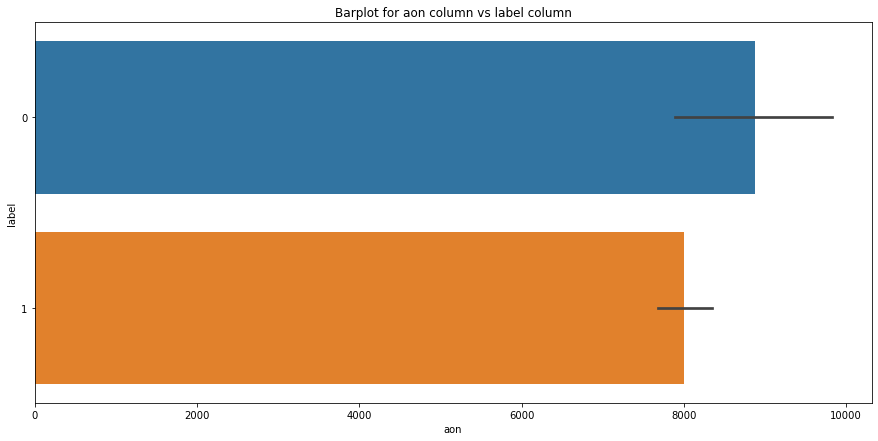

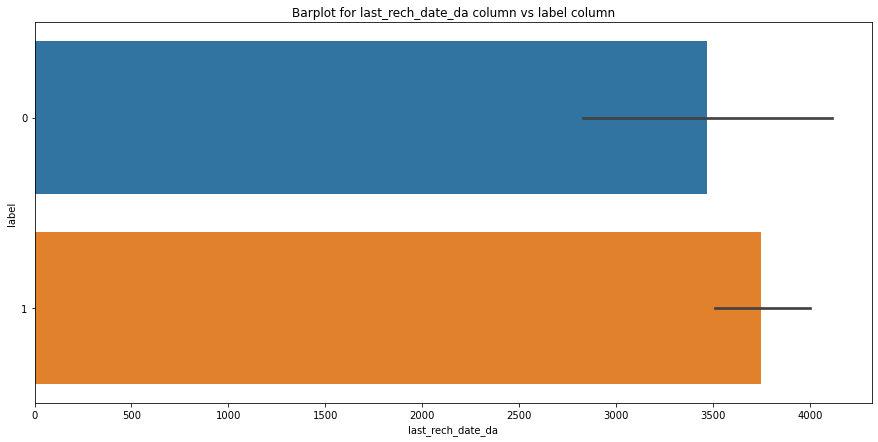

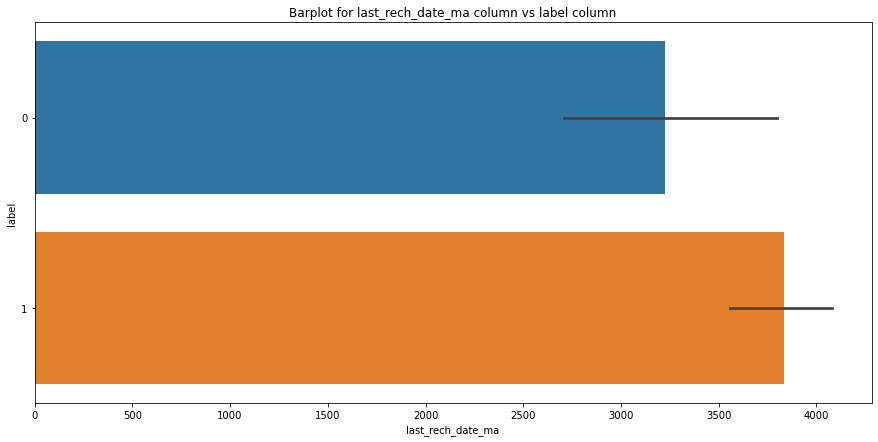

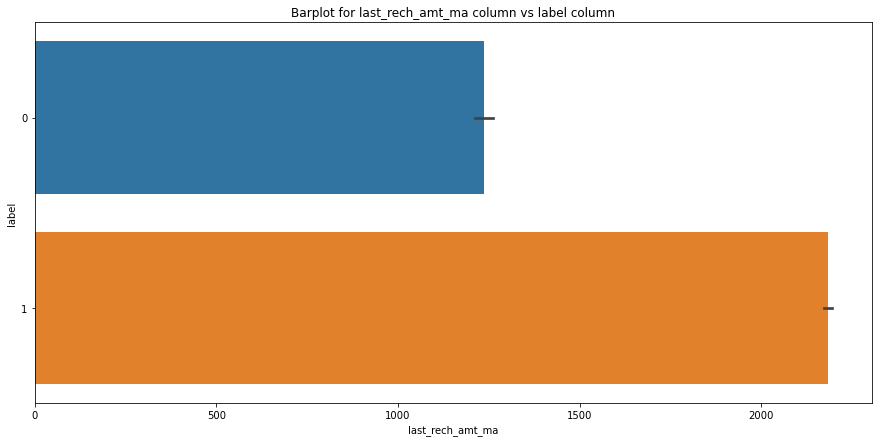

In [25]:
y = 'label'

x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_da'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The above bar plots show the success and failure in returning the credit amount by a user depending on the specified feature columns.

<AxesSubplot:xlabel='msisdn'>

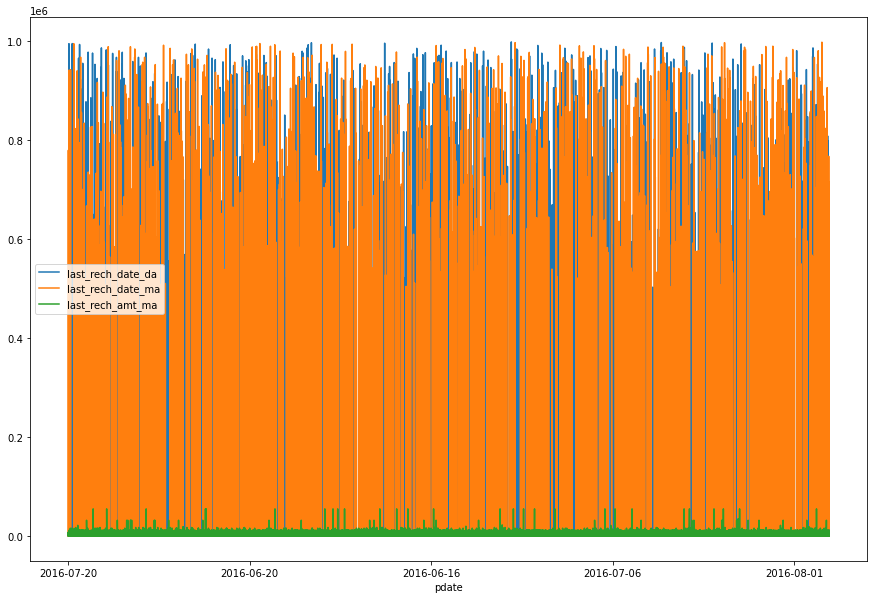

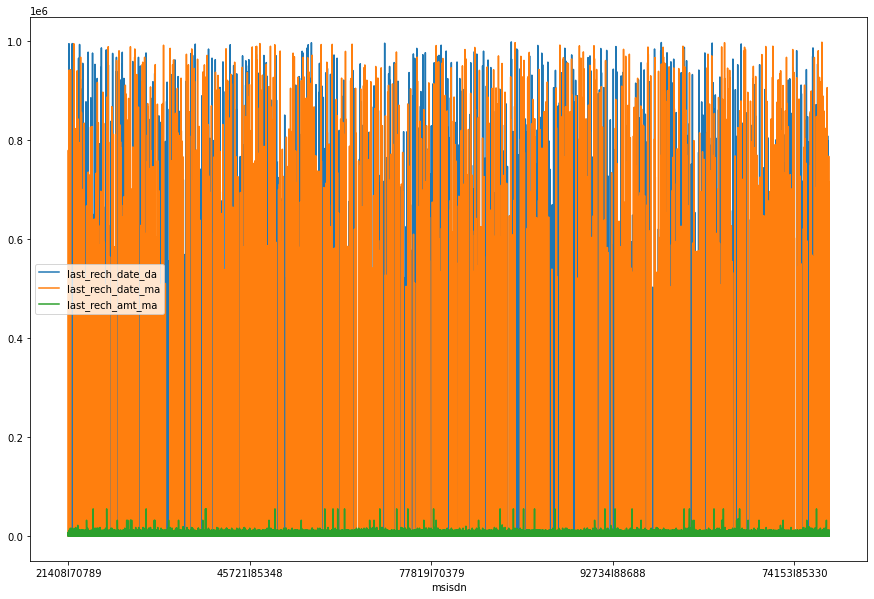

In [26]:
df.plot(kind="line", x="pdate", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[15,10])

df.plot(kind="line", x="msisdn", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[15,10])

Here we have line plots for date and mobile number data with respect to daily and monthly recharge information along with the amount factor.

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='sumamnt_ma_rech90'>

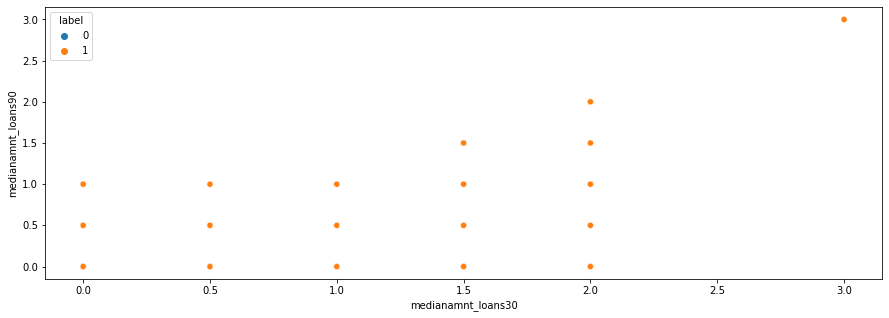

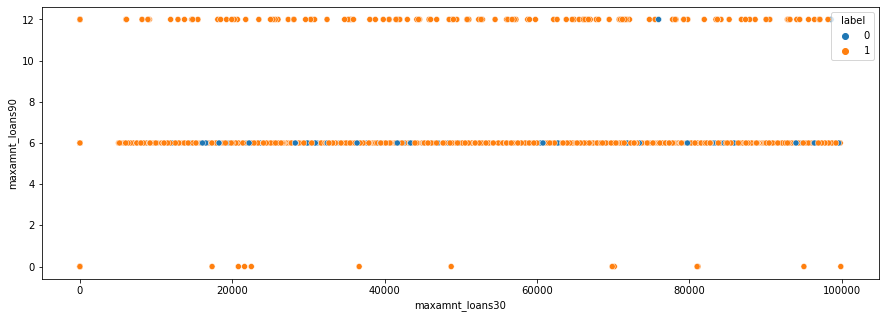

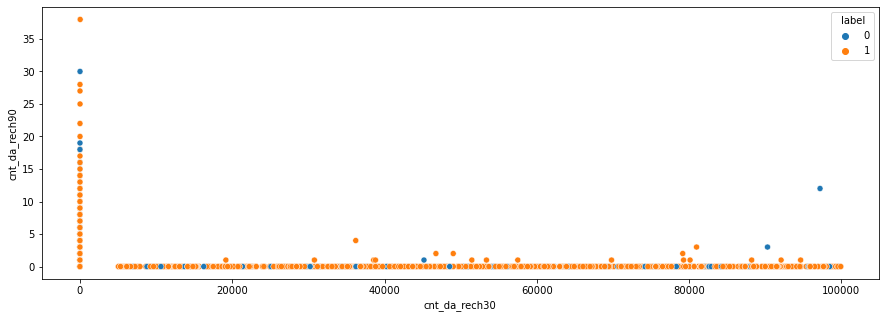

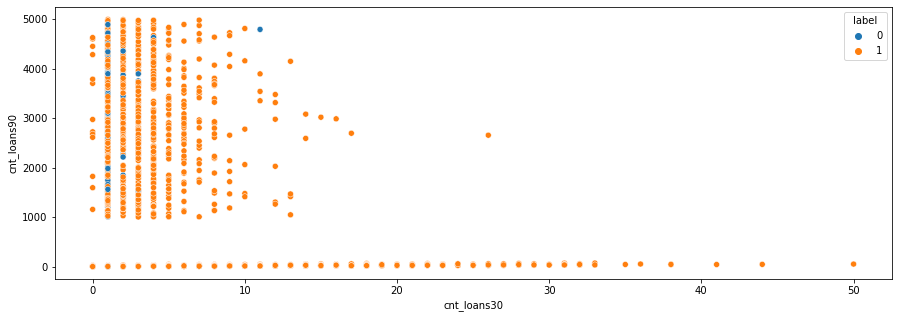

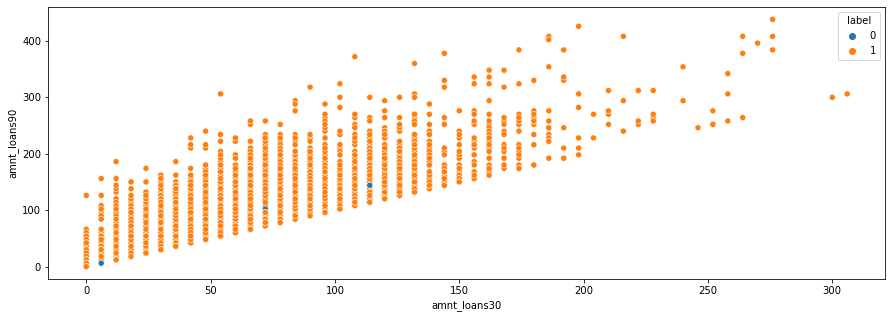

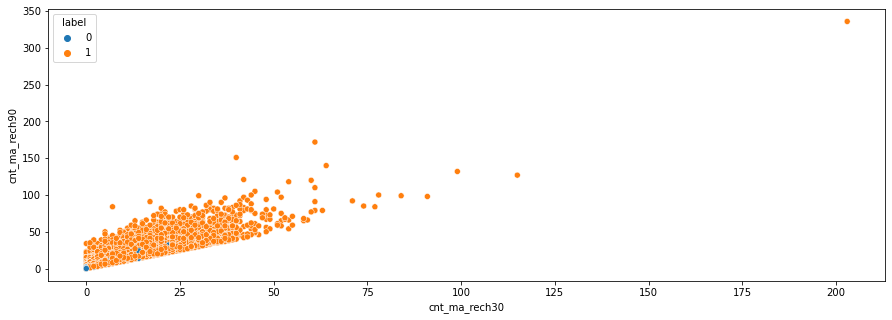

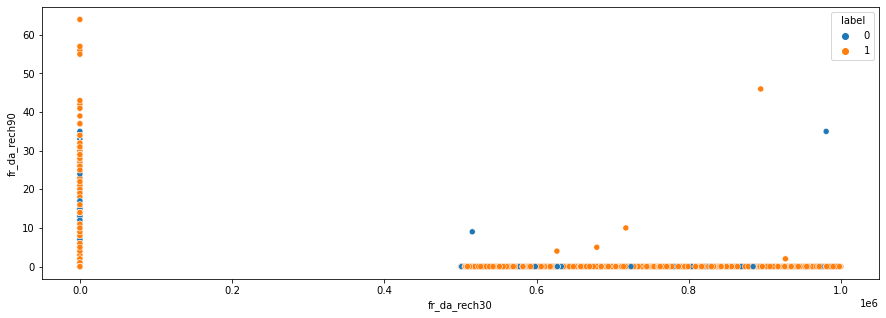

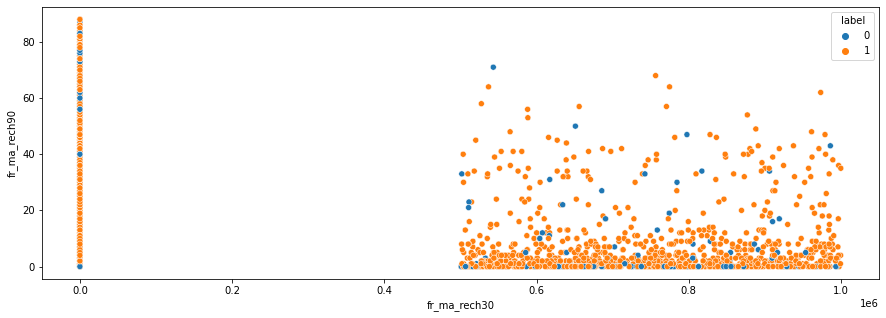

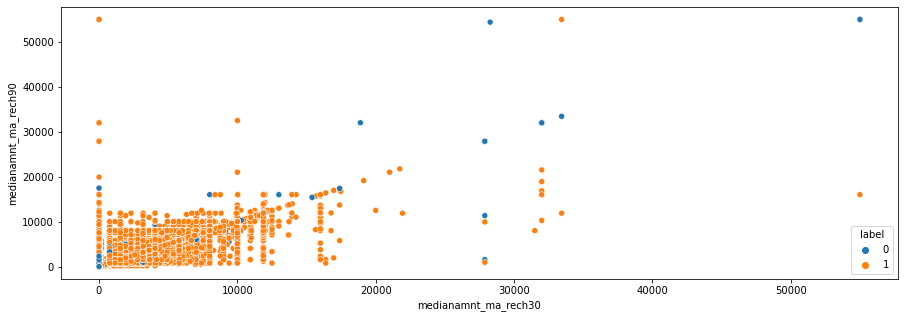

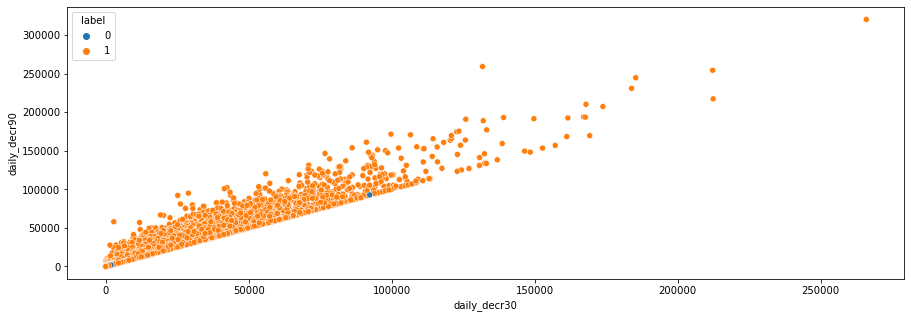

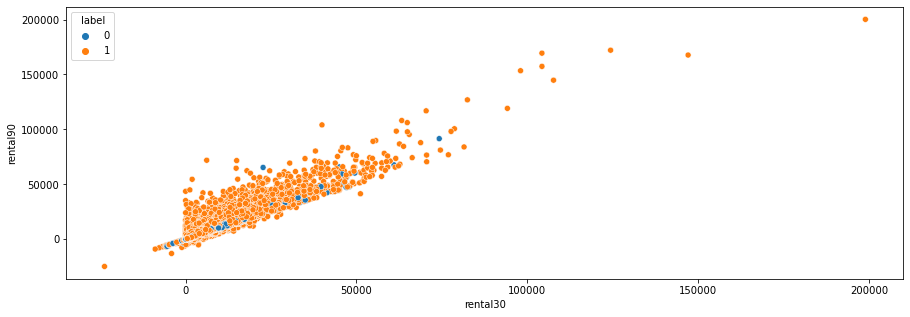

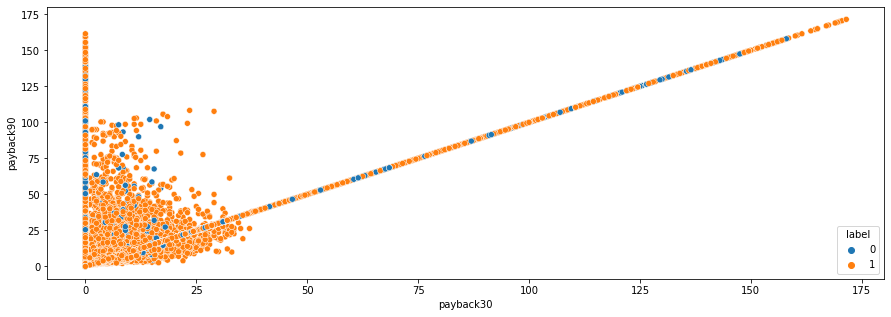

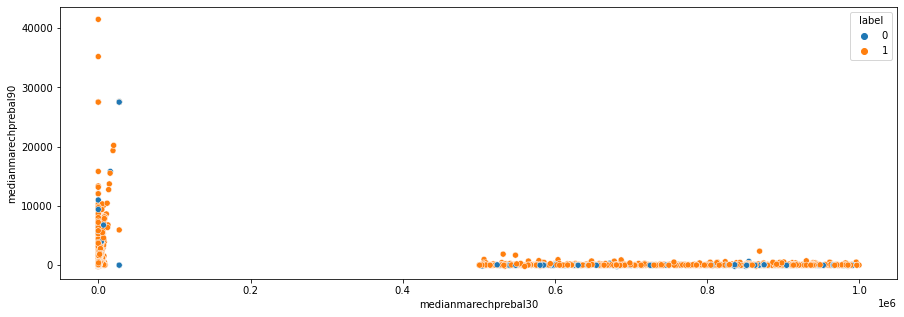

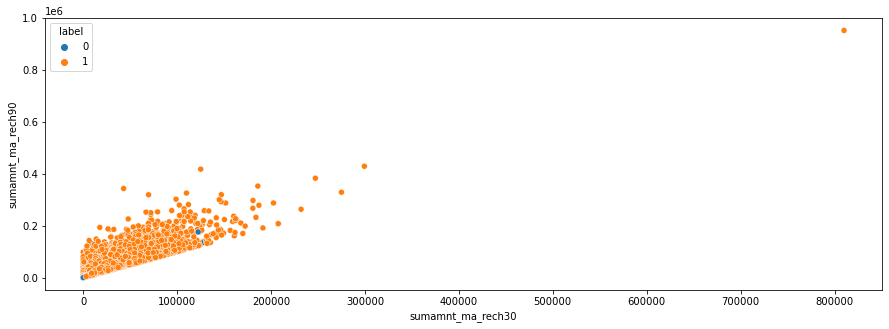

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_loans30', y='medianamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='maxamnt_loans30', y='maxamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_da_rech30', y='cnt_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_loans30', y='cnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='amnt_loans30', y='amnt_loans90', data=df, hue='label')
plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_ma_rech30', y='cnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_da_rech30', y='fr_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_ma_rech30', y='fr_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_ma_rech30', y='medianamnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='daily_decr30', y='daily_decr90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='rental30', y='rental90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='payback30', y='payback90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianmarechprebal30', y='medianmarechprebal90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='sumamnt_ma_rech30', y='sumamnt_ma_rech90', data=df, hue='label')

Using the scatter plot we are able to notice the data distribution and success failure points on those feature columns also showing any kind of outlier details present in the dataset.

# Multivariate Analysis

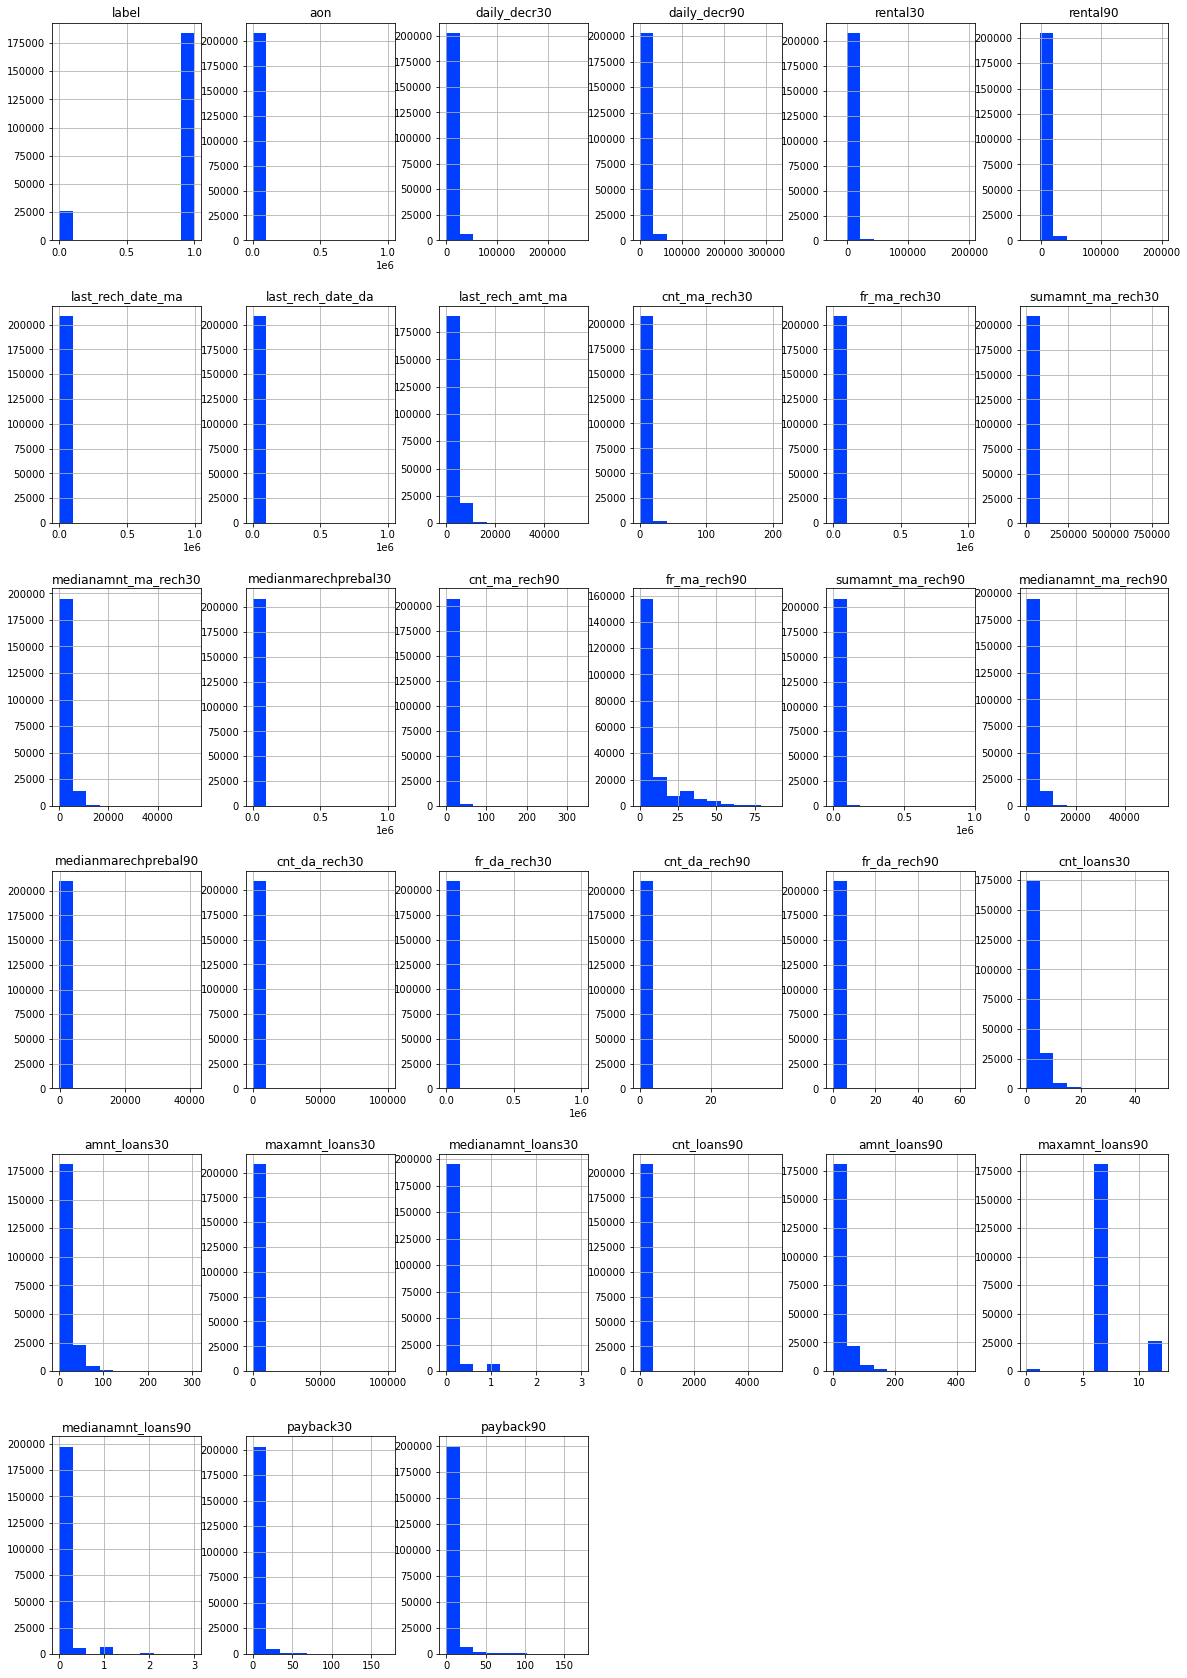

In [29]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,30))
plt.show()

##### Observation:

***`for feature aon:`***
- Data ranges from -48 to 999860 with Mean value of 8112.34.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature daily_descr30:`***
- Data ranges from -93 to 265926 with Mean value of 5381.4.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature daily_descr90:`***
- Data ranges from -93 to 320630 with Mean value of 6082.52.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature rental30:`***
- Data ranges from -23737.14 to 198926 with Mean value of 2692.58.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature rental90:`***
- Data ranges from -24720 to 200148 with Mean value of 3483.41.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature last_rech_date_ma:`***
- Data ranges from -29 to 998650 with Mean value of 3755.85.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature last_rech_date_da:`***
- Data ranges from -29 to 999178 with Mean value of 3712.2.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature last_rech_amt_ma:`***
- Data ranges from 0 to 55000 with Mean value of 2064.45.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature cnt_ma_rech30:`***
- Data ranges from 0 to 203 with Mean value of 3.98.
- Data is not distributed normally or in well curve.
- Data is spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature fr_ma_rech30:`***
- Data ranges from 0 to 999606 with Mean value of 3737.36.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature sumamnt_ma_rech30:`***
- Data ranges from 0 to 810096 with Mean value of 7704.5.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature medianamnt_ma_rech30:`***
- Data ranges from 0 to 55000 with Mean value of 1812.82.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature medianmarechprebal30:`***
- Data ranges from -200 to 999479 with Mean value of 3851.93.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature cnt_ma_rech90:`***
- Data ranges from 0 to 336 with Mean value of 6.32.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature fr_ma_rech90:`***
- Data ranges from 0 to 88 with Mean value of 7.72.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature sumamnt_ma_rech90:`***
- Data ranges from 0 to 953036 with Mean value of 12396.22.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature medianamnt_ma_rech90:`***
- Data ranges from 0 to 55000 with Mean value of 1864.6.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature medianmarechprebal90:`***
- Data ranges from -200 to 41456 with Mean value of 92.03.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature cnt_da_rech30:`***
- Data ranges from 0 to 99914 with Mean value of 262.58.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature fr_da_rech30:`***
- Data ranges from 0 to 999809 with Mean value of 3749.49.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

***`for feature cnt_da_rech90:`***
- Data ranges from 0 to 38 with Mean value of 0.04.
- Data is distributed normally but not in well curve.
- Data is positively skewed and need to be treated accordingly.

***`for feature fr_da_rech90:`***
- Data ranges from 0 to 64 with Mean value of 0.05.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature cnt_loans30:`***
- Data ranges from 0 to 50 with Mean value of 2.76.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature amnt_loans30:`***
- Data ranges from 0 to 306 with Mean value of 17.95.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature maxamnt_loans30:`***
- Data ranges from 0 to 99864 with Mean value of 274.66.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature medianamnt_loans30:`***
- Data ranges from 0 to 3 with Mean value of 0.05.
- Data is not distributed normally or in well curve and it is understandable as feature has only limited set of values.
- Data is positively skewed and needs to be treated accordingly.

***`for feature cnt_loans90:`***
- Data ranges from 0 to 4997.52 with Mean value of 18.52.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature amnt_loans90:`***
- Data ranges from 0 to 438 with Mean value of 23.65.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature maxamnt_loans90:`***
- Data ranges from 0 to 12 with Mean value of 6.7.
- Data is not distributed normally or in well curve and it understandable as user has two option for loans i.e., 5 and 10 for with 6 and 12 has to be paid.
- Data is positively skewed and needs to be treated accordingly.

***`for feature medianamnt_loans90:`***
- Data ranges from 0 to 3 with Mean value of 0.05.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature payback30:`***
- Data ranges from 0 to 171.5 with Mean value of 3.4.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

***`for feature payback90:`***
- Data ranges from 0 to 171.5 with Mean value of 4.32.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

Correlation using a Heatmap
Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

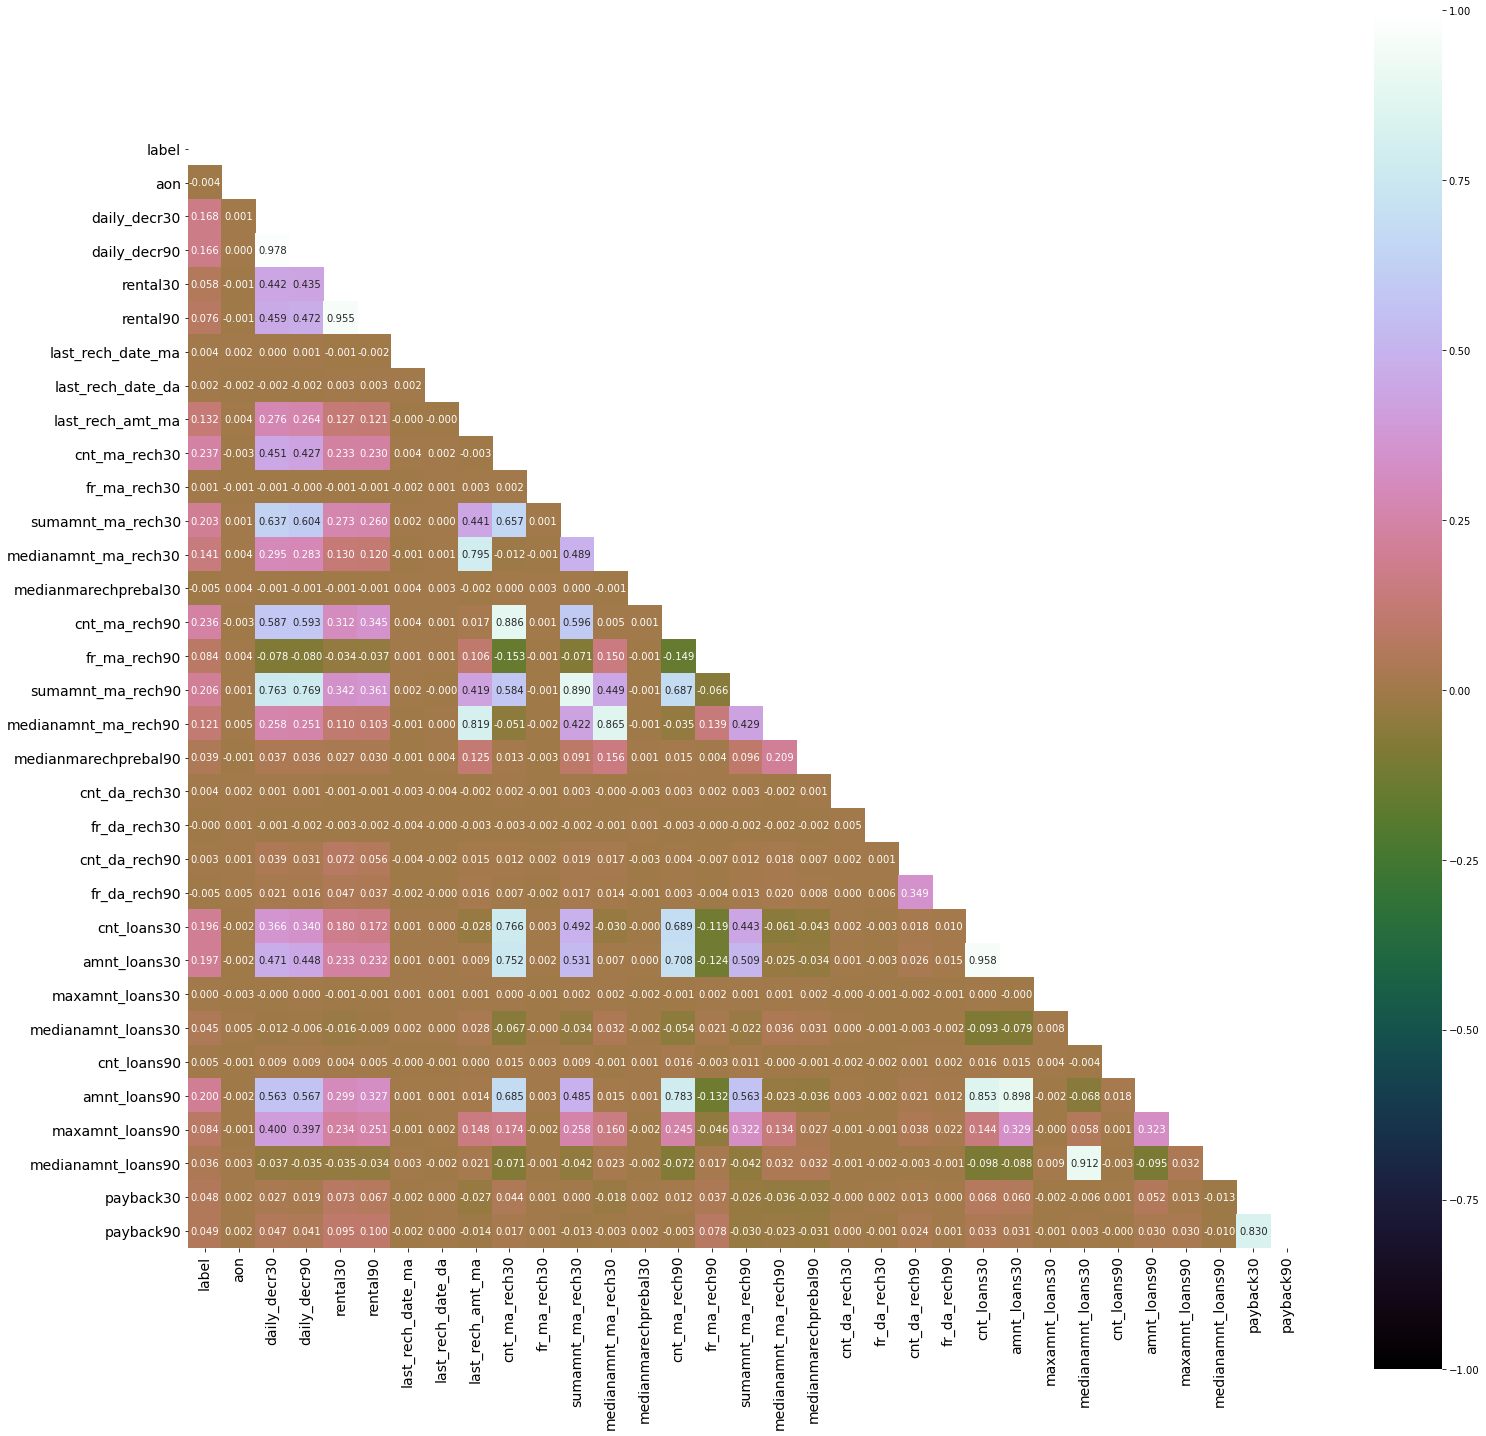

In [30]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heatmap due to lot of columns we are not able to see the correlation details however we can observe the color coding details and get a hint that there is no multi collinearity concern between the column values.

# Correlation Bar Plot comparing Gender column with the remaining columns

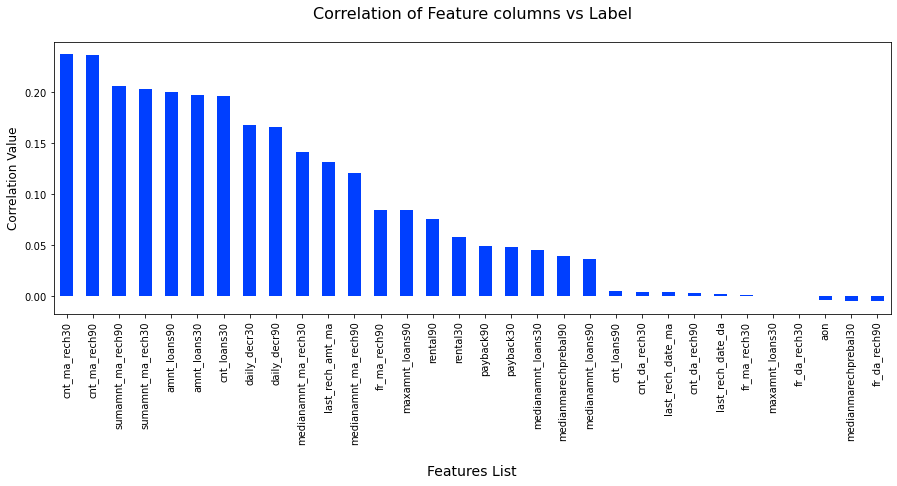

In [31]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['label'].sort_values(ascending=False).drop('label').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Data Preprocessing

In [32]:
df['pdate'] = pd.to_datetime(df['pdate']) # converting from object to datetime

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Date'].value_counts())

2016    209593
Name: Year, dtype: int64
7    85765
6    83154
8    40674
Name: Month, dtype: int64
11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5816
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Date, dtype: int64


In [33]:
df.drop(columns=['msisdn', 'pdate', 'Year'], axis=1, inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


# Outliers

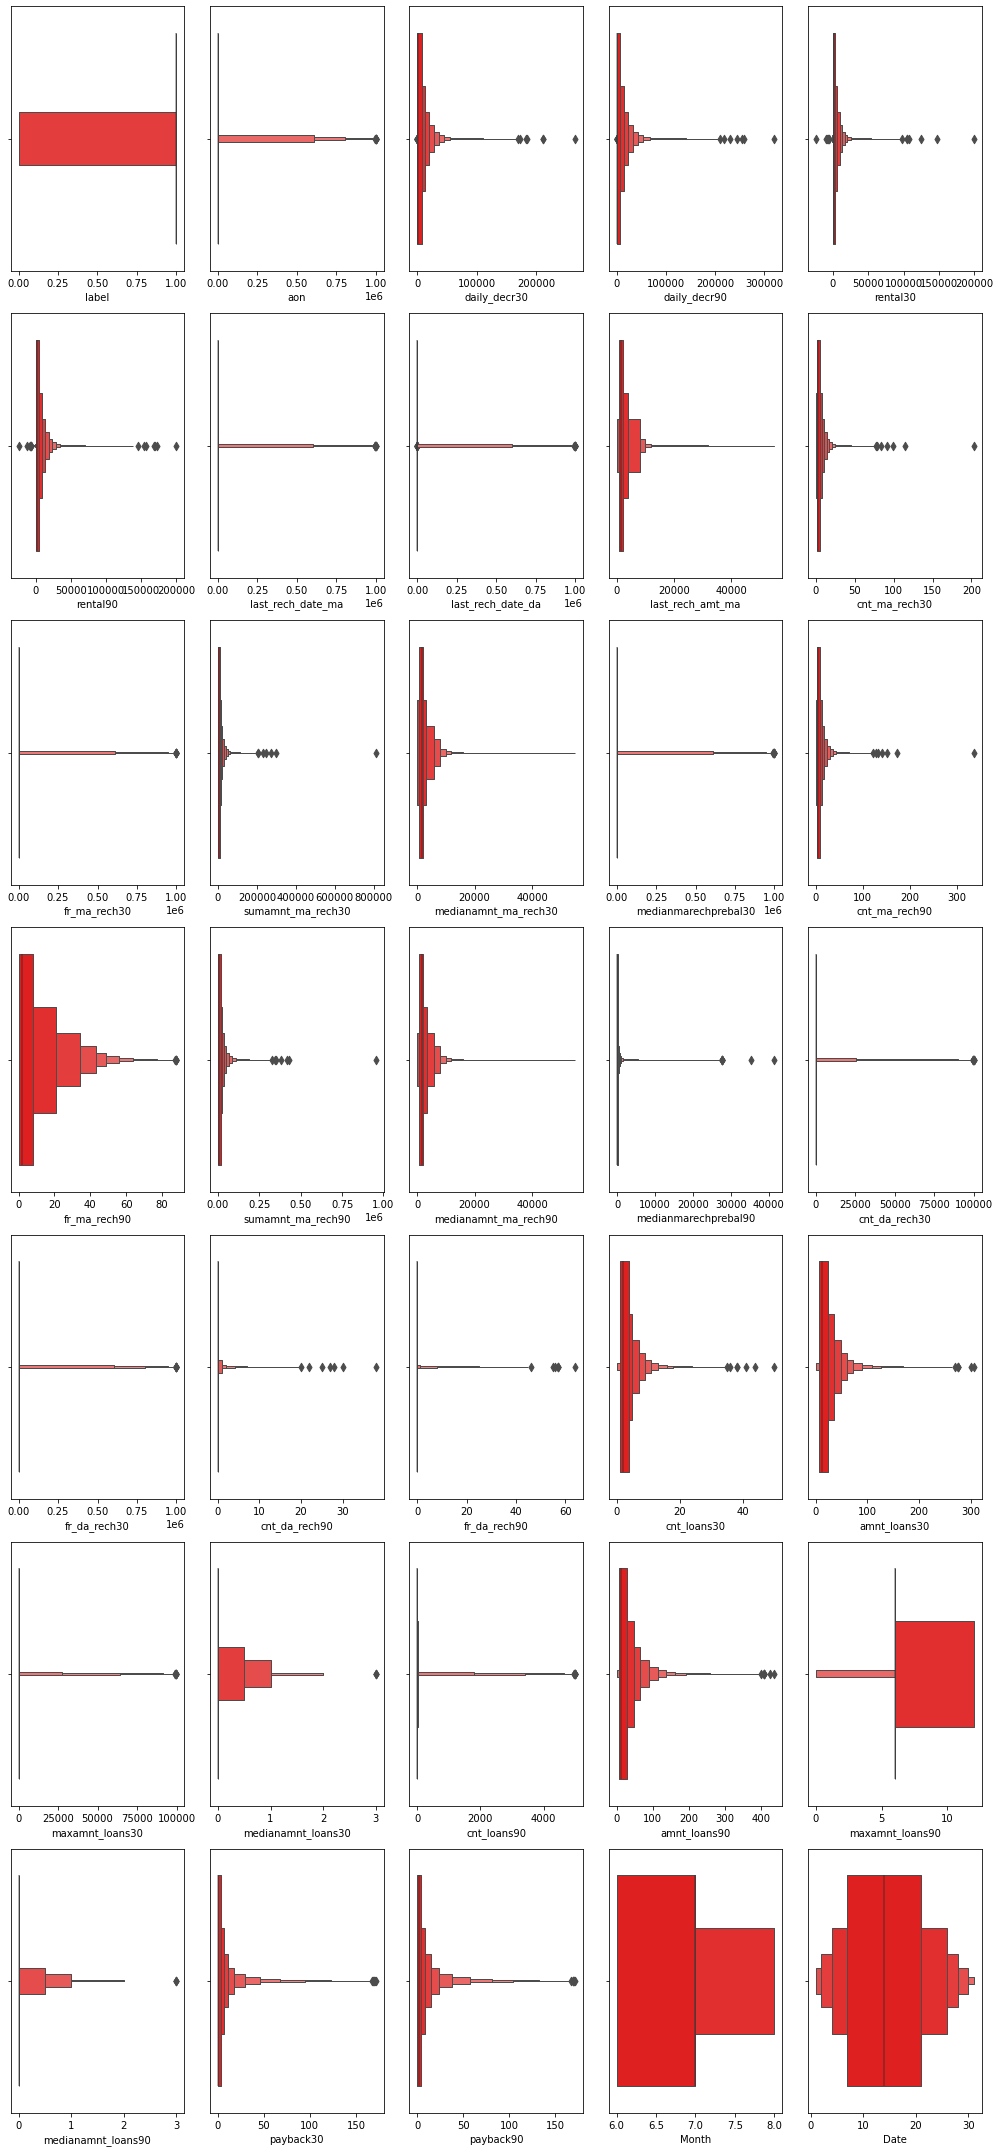

In [34]:
plt.figure(figsize=(14,30))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()

# With the help of boxen plot we can see the outlier details present in our numerical data columns. However when I tried removing the outliers using Z score or IQR methods I was losing close to 25 percent data therefore retaining all the data points as it is to avoid any NaN values.

In [36]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

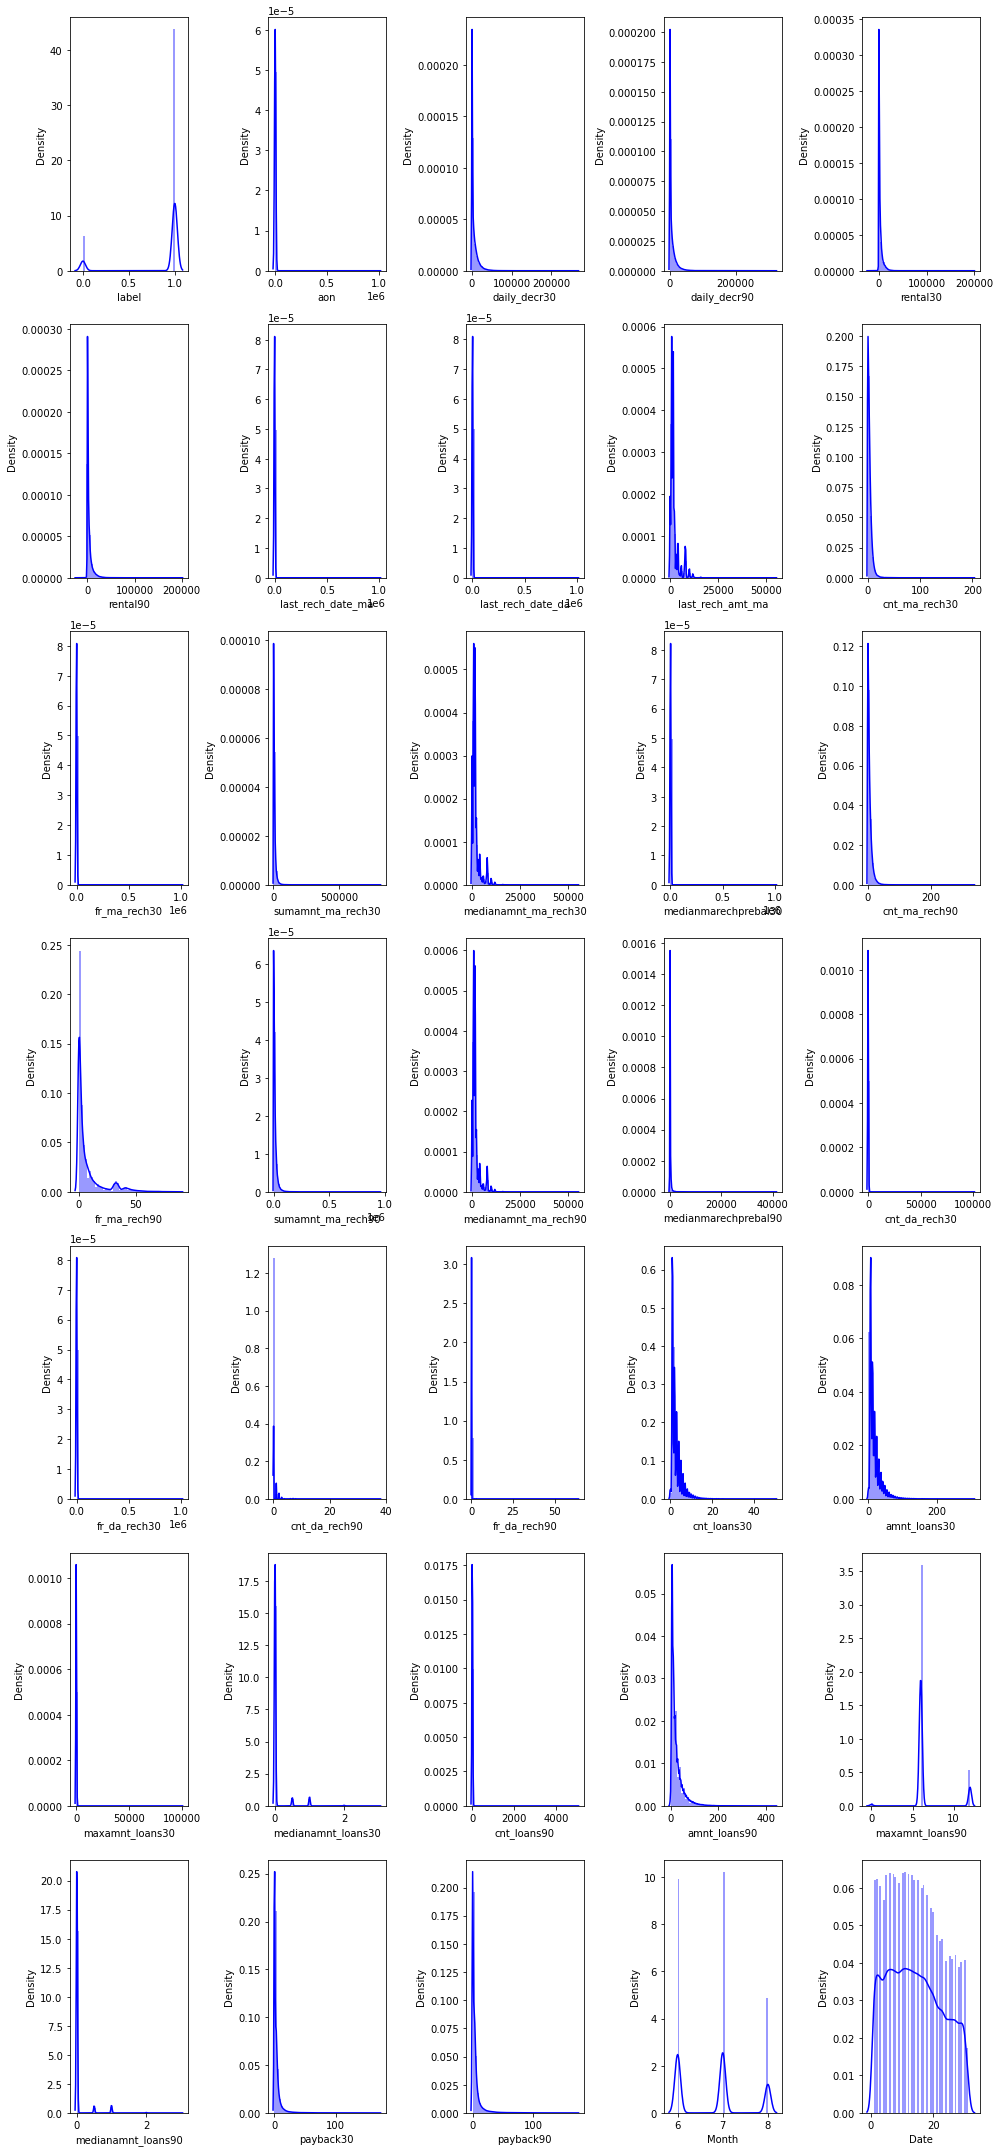

In [37]:
plt.figure(figsize=(14,30))
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.distplot(df[outl_df[i]], color='blue')
    plt.tight_layout()

With the help of distribution plot we can see the skewness details present in our numerical data columns. I tried using log transformation to reduce the skewness however that created NaN values for our dataset and hence I am trying to avoid that situation by using this slightly skewed data.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [38]:
X = df.drop('label', axis=1)
Y = df['label']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Resolving the class imbalance issue in our label column

In [39]:
old_label = Y.value_counts()
old_label

1    183431
0     26162
Name: label, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [40]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

`SMOTE` is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same number of rows covered.

In [41]:
new_label = Y.value_counts()
new_label

1    183431
0    183431
Name: label, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [42]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Month,Date
0,-0.105008,-0.073307,-0.107148,-0.534703,-0.519712,-0.068378,-0.068164,-0.069974,-0.216164,-0.068693,-0.264747,0.033624,-0.072943,-0.381176,1.242038,-0.379433,-0.014435,-0.168961,-0.060892,-0.068595,-0.088053,-0.054499,-0.060949,-0.137972,-0.062314,-0.232034,-0.067290,-0.255240,-0.283645,-0.219913,3.030003,2.524063,0.530301,0.754966
1,-0.099301,1.130964,0.920049,0.319180,0.139137,-0.068037,-0.068164,1.808946,-0.486367,-0.069092,0.049389,2.176927,-0.071978,-0.544119,-0.541464,-0.187497,2.078341,-0.029450,-0.060892,-0.068595,-0.088053,-0.054499,-0.527153,-0.137972,-0.060865,-0.232034,-0.072013,-0.255240,3.197384,-0.219913,-0.336946,-0.371618,2.019281,-0.531613
2,-0.101597,-0.293396,-0.296173,-0.367426,-0.396818,-0.068359,-0.068164,-0.069974,-0.486367,-0.069092,-0.443209,0.033624,-0.071883,-0.544119,-0.541464,-0.488474,-0.014435,-0.015692,-0.060892,-0.068595,-0.088053,-0.054499,-0.527153,-0.550180,-0.062314,-0.232034,-0.072013,-0.529475,-0.283645,-0.219913,-0.336946,-0.371618,2.019281,0.626308
3,-0.105410,-0.476258,-0.452275,-0.549637,-0.539050,-0.067640,-0.068164,-0.331820,-0.756570,-0.069092,-0.621672,-0.742869,-0.073078,-0.544119,-0.541464,-0.530418,-0.306083,-0.181990,-0.060892,-0.068595,-0.088053,-0.054499,-0.060949,-0.137972,-0.062314,-0.232034,-0.067290,-0.255240,-0.283645,-0.219913,-0.336946,-0.371618,-0.958680,-1.046245
4,-0.096254,-0.459072,-0.437604,-0.318529,-0.358650,-0.068340,-0.068164,0.270602,1.134853,-0.069054,1.700893,0.422123,-0.072556,0.596485,-0.371607,1.067209,0.650150,-0.097304,-0.060892,-0.068595,-0.088053,-0.054499,2.270066,1.923072,-0.062314,-0.232034,-0.043673,1.115934,-0.283645,-0.219913,-0.066042,-0.138633,-0.958680,1.012282


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Classification Models

In [ ]:
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

# Feature importance bar graph

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (16,8)
importances.plot.bar(color='teal')
importances

In [ ]:
lt.rcParams["figure.figsize"] = (16,8)
importances.plot.bar(color='teal')

In [ ]:
X.drop(["last_rech_date_da", "cnt_da_rech90", "cnt_da_rech30", "fr_da_rech30", "fr_da_rech90"], axis=1, inplace=True)

# Creating the training and testing data sets with optimum Random State

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

# Machine Learning Model for Classification with Evaluation Metrics

In [ ]:
# Classification Model Function

def classify(model_func):
    
    for model_name, model in model_func.items():
        
        # Training the model
        model.fit(X_train, Y_train)
    
        # Predicting Y_test
        pred = model.predict(X_test)
        
        print('\n##############################',model_name,'##############################')
        
        # Classification Report
        class_report = classification_report(Y_test, pred)
        print("\nClassification Report for {}:\n".format(model_name), class_report)
    
        # Accuracy Score
        acc_score = (accuracy_score(Y_test, pred))*100
        print("Accuracy Score for {}:".format(model_name), acc_score)
    
        # Cross Validation Score
        cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
        print("Cross Validation Score for {}:".format(model_name), cv_score)
    
        # Result of accuracy minus cv scores
        result = acc_score - cv_score
        print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [ ]:
LR = LogisticRegression()
ETC = ExtraTreesClassifier()
SVCM = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
DTC = DecisionTreeClassifier(max_depth=15, random_state=21)
RFC = RandomForestClassifier(max_depth=15, random_state=111)
KNN = KNeighborsClassifier(n_neighbors=15)
XGB = xgb.XGBClassifier(verbosity=0)
LGBM = lgb.LGBMClassifier()

models = {'Logistic Regression' : LR,
         'Extra Trees Classifier' : ETC,
         'Support Vector Classifier' : SVCM,
         'Decision Tree Classifier' : DTC,
         'Random Forest Classfier' : RFC,
         'K Nearest Neighbors Classifier' : KNN,
         'XGB Classifier' : XGB,
         'LGBM Classifier' : LGBM}

In [ ]:
# disp = plot_roc_curve(LR, X_test, Y_test)
# plot_roc_curve(ETC, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(SVCM, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(KNN, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(LGBM, X_test, Y_test, ax=disp.ax_)
# plt.legend(prop={'size':10}, loc = 'best')
# plt.show()

# Hyper parameter tuning on the best Classification ML Model

In [ ]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'max_depth' : [30, 40],
              'n_estimators' : [300, 350],
              'min_samples_split' : [3, 4],
              'random_state' : [42, 72]
             }

GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)
GSCV.best_params_

After comparing all the classification models I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. I am using the Grid Search CV method for hyper parameter tuning my best model. I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes. So the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model that I can use on my final model.

In [ ]:
Final_Model = ExtraTreesClassifier(criterion="entropy", max_depth=30, min_samples_split=3, 
                                   n_estimators=350, random_state=72)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

# AUC ROC Curve¶

In [ ]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# confusion matrics

In [ ]:
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for the Final Model \n')
plt.show()

# Saving the model

In [ ]:
filename = "FinalModel_MicroCreditLoanDefaulter.pkl"
joblib.dump(Final_Model, filename)

# Loading the final model

In [ ]:
load_model = joblib.load(filename)
result = load_model.score(X_test, Y_test)*100
print(result)

Now I am loading the previously saved final model to test the score on our testing dataset. But it can be used to test the model on unseen data values as well and then predict the label accordingly.

# Conclusion:

> Key Findings and Conclusions of the Study: 
From the final model MFI can find if a person will return money or not and should a MFI provide a load to that person or not judging from the various features taken into consideration

> Learning Outcomes of the Study in respect of Data Science: 
I built multiple classification models and did not rely on one single model for getting better accuracy and using cross validation comparison I ensured that the model does not fall into overfitting and underfitting issues. I picked the best one and performed hyper parameter tuning on it to enhace the scores.

> Limitations of this work and Scope for Future Work: 
Limitation is it will only work for this particular use case and will need to be modified if tried to be utilized on a different scenario but on a similar scale.
Scope is that we can use it in companies to find whether we should provide loan to a person or not and we can also make prediction about a person buying an expensive service on the basis of there personal details that we have in this dataset like number of times data account got recharged in last 30 days and daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) so even a marketing company can also use this.

